In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)

faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [12]:
faces.data.shape

(1348, 2914)

In [13]:
faces.target_names
len(faces.data)

1348

In [14]:
faces.images.shape

(1348, 62, 47)

In [15]:
# 打乱顺序
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]
example_faces = X[:36,:]
example_faces.shape

(36, 2914)

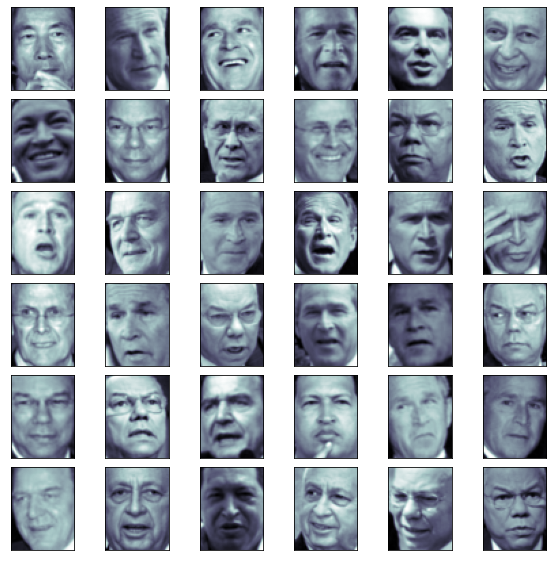

In [16]:
def plot_faces(faces):

    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()

plot_faces(example_faces)

## 特征脸

In [17]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)

CPU times: user 5.36 s, sys: 163 ms, total: 5.52 s
Wall time: 1.51 s


PCA(svd_solver='randomized')

In [18]:
pca.components_.shape

(1348, 2914)

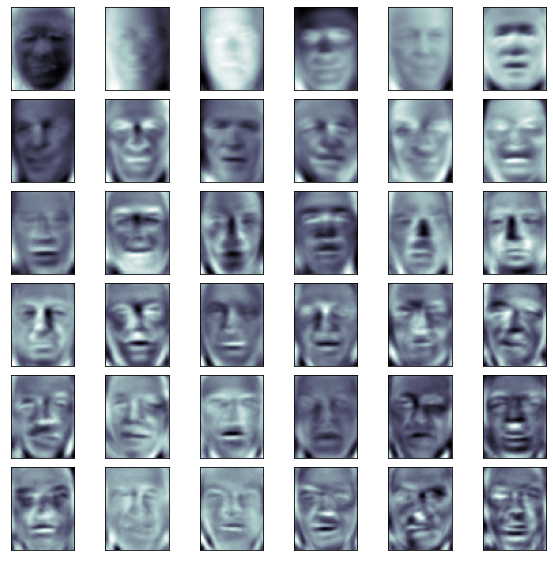

In [19]:
plot_faces(pca.components_[:36,:])